In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def modified_archies(v_list):
    """
    v_list : list
             [(sigma_0, phi_0, m_N),...(sigma_N, phi_N, m_N)]
             
    """
    ma = np.sum([v[0]*v[1]**v[2] for v in v_list])
    return ma

In [8]:
sigma_r = .001
sigma_f = 1./.01
sigma_m = 100

m_r = .05
m_f = 2.
m_m= 3.

In [9]:
mc_arr = []
for phi_r in np.arange(0, 1, .01):
    for phi_f in np.arange(0, 1, .01):
        for phi_m in np.arange(0, 1, .01):
            if phi_r+phi_f+phi_m != 1.0:
                continue
            else:
                sigma_bulk = modified_archies([(sigma_r, phi_r, m_r), (sigma_f, phi_f, m_f), (sigma_m, phi_m, m_m)])
                mc_arr.append((sigma_bulk, phi_r, phi_f, phi_m))
                
mc_arr = np.array(mc_arr,  dtype=[('sigma', np.float), 
                                             ('phi_rock', np.float),
                                             ('phi_fluid', np.float), 
                                             ('phi_mineral', np.float)])
mc_arr.sort(order='sigma')

In [10]:
print 'Mean Conductivity   = {0:.2f}'.format(mc_arr['sigma'].mean())
print 'Median Conductivity = {0:.2f}'.format(np.median(mc_arr['sigma']))

Mean Conductivity   = 27.06
Median Conductivity = 23.55


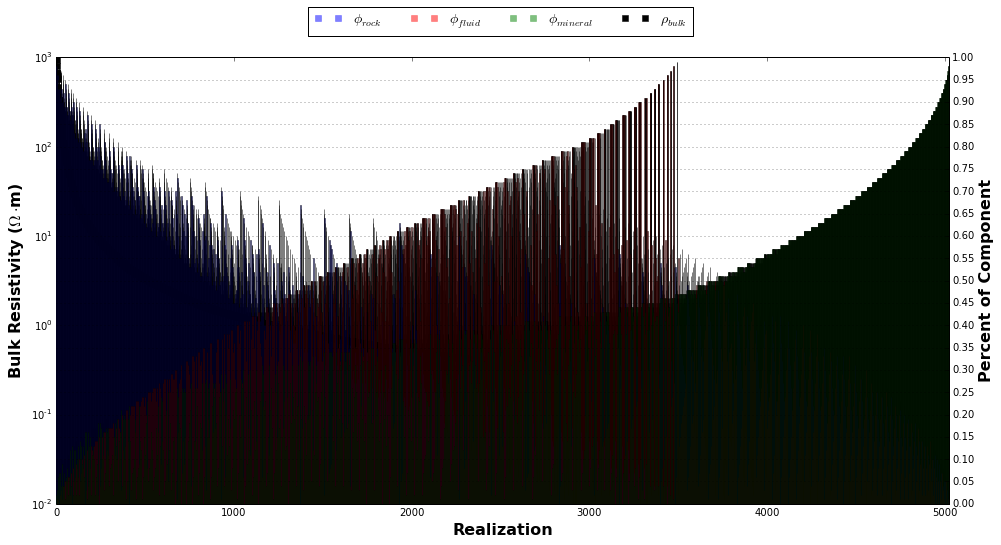

In [6]:
fig = plt.figure(4, [16,8],dpi=300)
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()

for ii, mc in enumerate(mc_arr):
    ax2.fill_between([ii, ii+1], 0, mc['phi_rock'], facecolor='blue', alpha=.5)# ls='None', marker='s', mfc=(0, 0, 1), mec=(0, 0, 1), ms=2)
    ax2.fill_between([ii, ii+1], 0, mc['phi_fluid'], facecolor='red', alpha=.5)
    ax2.fill_between([ii, ii+1], 0, mc['phi_mineral'], facecolor='green', alpha=.5)
    #ax2.plot(ii, mc['phi_fluid'], ls='None', marker='s', mfc=(1, 0, 0), mec=(1, 0, 0), ms=2)
    #ax2.plot(ii, mc['phi_mineral'], ls='None', marker='s', mfc=(0, 1, 0), mec=(0, 1, 0), ms=2)

for ii, mc in enumerate(mc_arr): 
    l4, = ax.semilogy(ii, 1./mc['sigma'], ls='None', marker='s', mfc=(0, 0, 0), mec=(0, 0, 0), ms=6)
    
l1, = ax.plot(0, 0, ls='None', marker='s', mfc='blue', mec='blue', alpha=.5)
l2, = ax.plot(0, 0, ls='None', marker='s', mfc='red', mec='red', alpha=.5)
l3, = ax.plot(0, 0, ls='None', marker='s', mfc='green', mec='green', alpha=.5)

ax.set_ylabel('Bulk Resistivity ($\Omega \cdot$m)', fontdict={'size':16, 'weight':'bold'})
ax.set_xlabel('Realization', fontdict={'size':16, 'weight':'bold'})
ax2.set_ylabel('Percent of Component', fontdict={'size':16, 'weight':'bold'})
ax.set_xlim(0, len(mc_arr))
ax2.grid(True, alpha=.8)
ax2.set_yticks(np.arange(0, 1.05, .05))

fig.legend([l1, l2, l3, l4], [r'$\phi_{rock}$', r'$\phi_{fluid}$', r'$\phi_{mineral}$', r'$\rho_{bulk}$'],
          loc='upper center', ncol=4, prop={'size':14})

             Rock   Fluid    Mineral
Mean Percent   0.74   0.10   0.16
Median Percent 0.74   0.10   0.18
Min Percent    0.62   0.00   0.00
Max Percent    0.91   0.17   0.31
STD            0.07   0.05   0.09


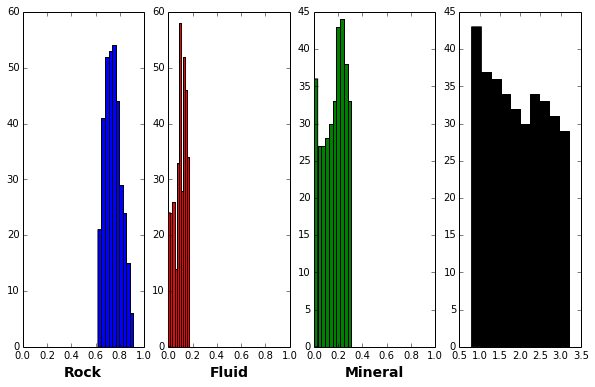

In [14]:
sigma_measure = 1./.5
tol = .6

find = np.where((mc_arr['sigma']>=sigma_measure*(1-tol)) & (mc_arr['sigma']<=sigma_measure*(1+tol)))

fig = plt.figure(5, [10, 6], dpi=300)
ax1 = fig.add_subplot(1, 4, 1)
h1 = ax1.hist(mc_arr['phi_rock'][find], color='blue')

ax2 = fig.add_subplot(1, 4, 2)
h2 = ax2.hist(mc_arr['phi_fluid'][find], color='red')

ax3 = fig.add_subplot(1, 4, 3)
h3 = ax3.hist(mc_arr['phi_mineral'][find], color='green')

ax4 = fig.add_subplot(1, 4, 4)
h4 = ax4.hist(mc_arr['sigma'][find], color='black')

for ax, label in zip ([ax1, ax2, ax3], ['Rock', 'Fluid', 'Mineral']):
    ax.set_xlim(0, 1)
    ax.set_xlabel(label, fontdict={'size':14, 'weight':'bold'})
    
print '             Rock   Fluid    Mineral'
print 'Mean Percent   {0:.2f}   {1:.2f}   {2:.2f}'.format(mc_arr['phi_rock'][find].mean(),
                                                      mc_arr['phi_fluid'][find].mean(),
                                                      mc_arr['phi_mineral'][find].mean())
print 'Median Percent {0:.2f}   {1:.2f}   {2:.2f}'.format(np.median(mc_arr['phi_rock'][find]),
                                                          np.median(mc_arr['phi_fluid'][find]),
                                                          np.median(mc_arr['phi_mineral'][find]))
print 'Min Percent    {0:.2f}   {1:.2f}   {2:.2f}'.format(mc_arr['phi_rock'][find].min(),
                                                      mc_arr['phi_fluid'][find].min(),
                                                      mc_arr['phi_mineral'][find].min())
print 'Max Percent    {0:.2f}   {1:.2f}   {2:.2f}'.format(mc_arr['phi_rock'][find].max(),
                                                      mc_arr['phi_fluid'][find].max(),
                                                      mc_arr['phi_mineral'][find].max())
print 'STD            {0:.2f}   {1:.2f}   {2:.2f}'.format(mc_arr['phi_rock'][find].std(),
                                                      mc_arr['phi_fluid'][find].std(),
                                                      mc_arr['phi_mineral'][find].std())

